In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

%matplotlib inline

from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


##### Administrative - Number of pages visited by the visitor about account management
##### Administrative duration - Total amount of time (in seconds) spent by the visitor on account management related pages
##### Informational - Number of pages visited by the visitor about Web site, communication and address information of the shopping site
##### Informational duration - Total amount of time (in seconds) spent by the visitor on informational pages
##### productRelated - Number of pages visited by visitor about product related pages
##### productRelated_Duration - Total amount of time (in seconds) spent by the visitor on product related pages
##### Bounce rate - Average bounce rate value of the pages visited by the visitor
##### Exit rate - Average exit rate value of the pages visited by the visitor
##### Page value - Average page value of the pages visited by the visitor
##### Special day - Closeness of the site visiting time to a special day
##### Region - Geographic region from which the session has been started by the visitor
##### TrafficType - Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
##### VisitorType - Visitor type as ‘New Visitor’ ‘Returning Visitor’ and ‘Other’
##### Weekend - Boolean value indicating whether the date of the visit is weekend
##### Revenue - Class label indicating whether the visit has been finalized with a transaction

In [5]:
df['Revenue'] = np.where(df['Revenue']==True, 1, 0)

In [6]:
df['VisitorType'] = np.where(df['VisitorType'] == 'Returning_Visitor', 1, 0)

In [7]:
col_list = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']
df['Total_Duration'] = df[col_list].sum(axis=1)

In [8]:
col = ['Revenue', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Total_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
feature = df[col]

In [9]:
feature.head()

,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Total_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,0,0.0,1,0.000000,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,False
1,0,0,0.0,0,0.0,2,64.000000,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,1,False
2,0,0,0.0,0,0.0,1,0.000000,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,1,False
3,0,0,0.0,0,0.0,2,2.666667,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,1,False
4,0,0,0.0,0,0.0,10,627.500000,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,True


In [10]:
X = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Total_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
X = X.fillna(0).values

y = df['Revenue']

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
kf = KFold(n_splits=10, shuffle=True)

# Classify with 10-Fold Cross Validation

In [12]:
accuracy = []
classifier = []

In [13]:
## KNN 10-FOLD
knn = KNeighborsClassifier(n_neighbors=3)

acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('KNN')
accuracy.append(np.mean(acc))

0.8530413625304136
0.5432536848990185
0.3277987158200424


In [14]:
## LR 10-FOLD
logisticRegr = LogisticRegression()

acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logisticRegr.fit(X_train, y_train)
    pred = logisticRegr.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('LogisticRegression')
accuracy.append(np.mean(acc))

0.8821573398215735
0.7393282398903477
0.370989254398829


In [15]:
## Decision Tree 10-Fold
acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('DecisionTree')
accuracy.append(np.mean(acc))

0.8493106244931063
0.5142422662364442
0.5376509675253887


In [16]:
## Random Forest 10-Fold
acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('RandomForest')
accuracy.append(np.mean(acc))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarnin

0.8452554744525548
0.0
0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
## SVM 10-Fold
acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('SVM')
accuracy.append(np.mean(acc))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarnin

0.8451743714517438


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8742903487429035

In [14]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8507704785077048

In [15]:
clf = SVC(gamma='auto').fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8507704785077048

In [21]:
Data = {'Classifier': classifier, 'Accuracy': accuracy}
model_acc = pd.DataFrame(Data,columns=['Classifier','Accuracy'])
model_acc

,Classifier,Accuracy
0,KNN,0.853041
1,LogisticRegression,0.882157
2,DecisionTree,0.849311
3,RandomForest,0.845255
4,SVM,0.845174


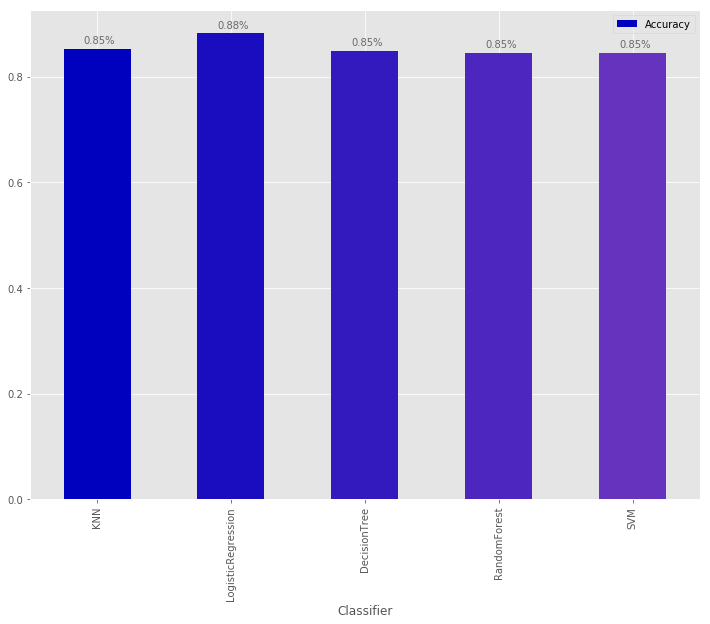

In [39]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(model_acc))]

ax = model_acc.plot(x ='Classifier', y='Accuracy', kind = 'bar', stacked=True, color=my_colors, figsize=(12,9))

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+.01, \
            str(round(i.get_height(),2))+'%', fontsize=10,
                color='dimgrey')

# Feature Visualisation

In [36]:
lookup_table = ['Revenue', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Total_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

In [35]:
feature.shape[1]

18

In [44]:
def corr_draw(df,x,y):
    groups = df.groupby('label')
    
    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
    ax.set_xlabel(lookup_table[x])
    ax.set_ylabel(lookup_table[y])
    ax.legend()

    plt.show()

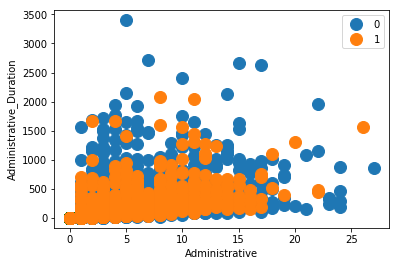

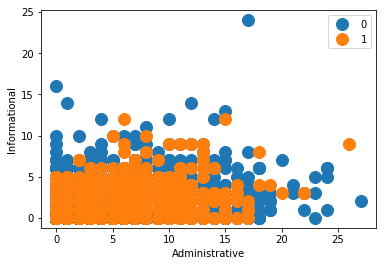

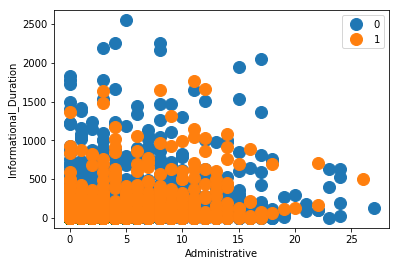

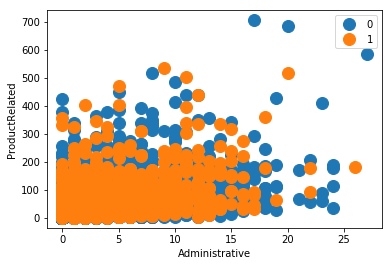

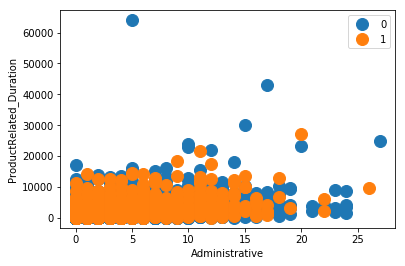

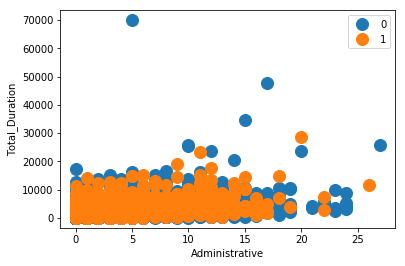

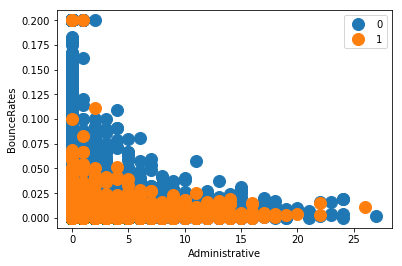

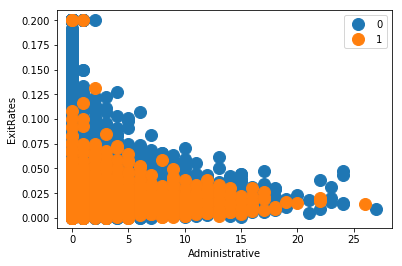

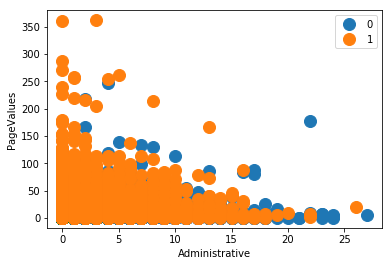

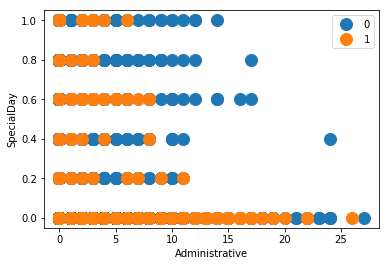

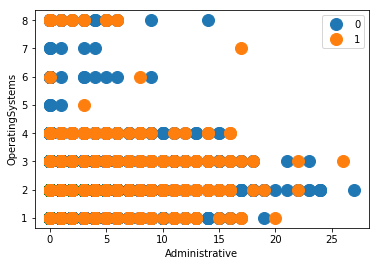

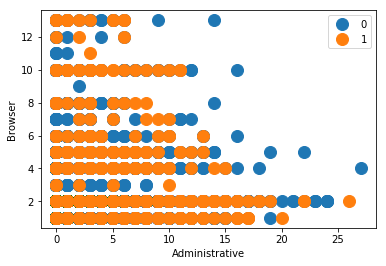

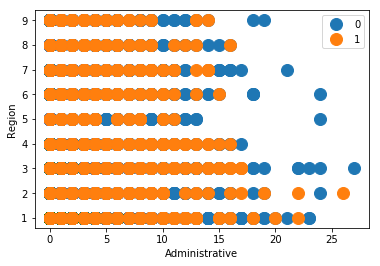

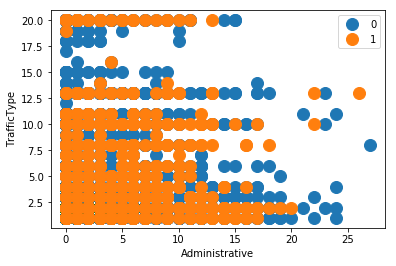

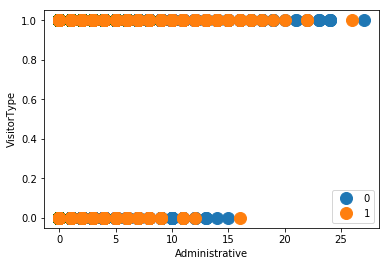

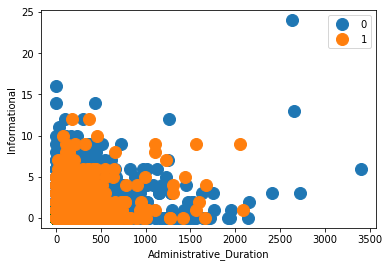

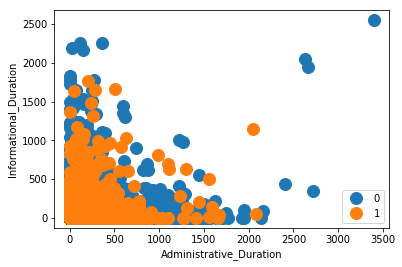

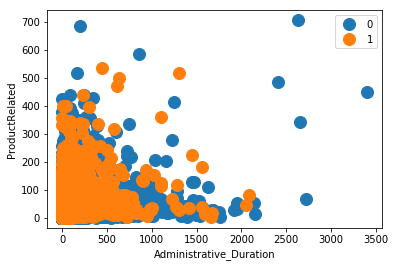

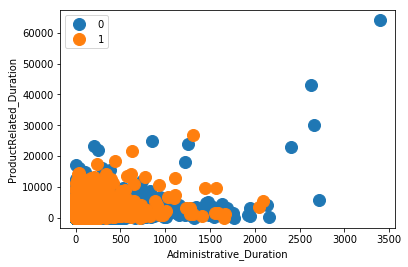

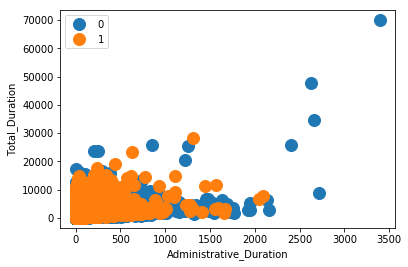

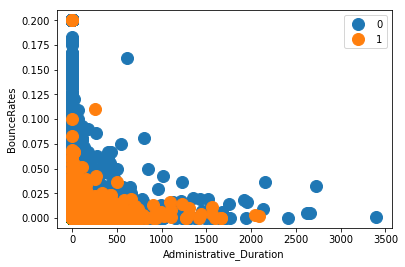

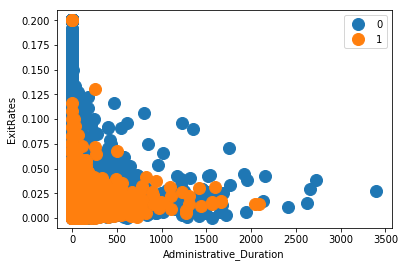

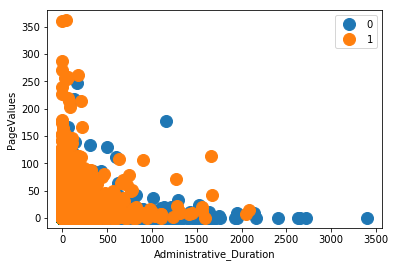

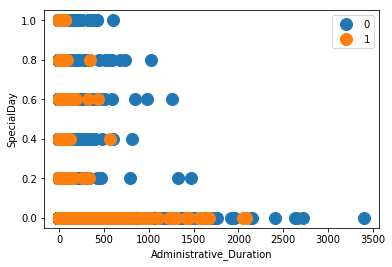

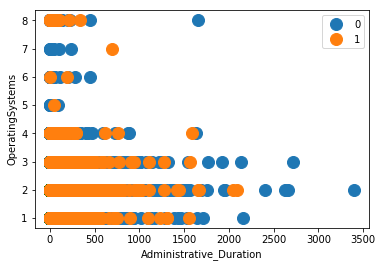

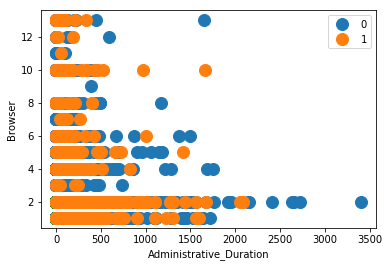

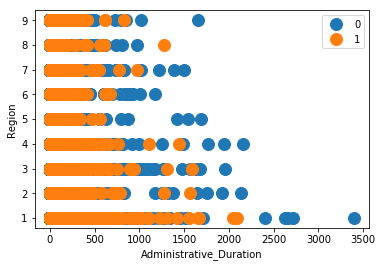

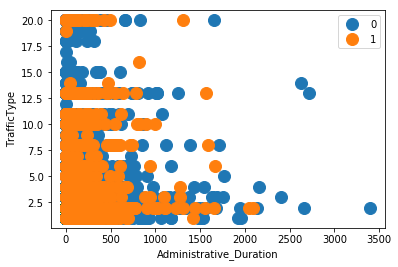

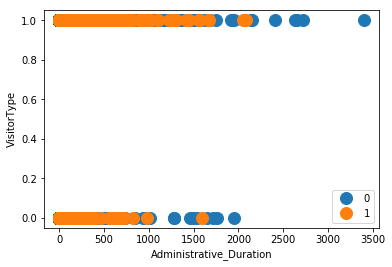

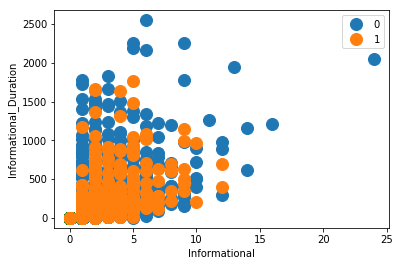

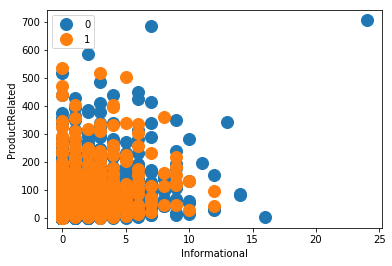

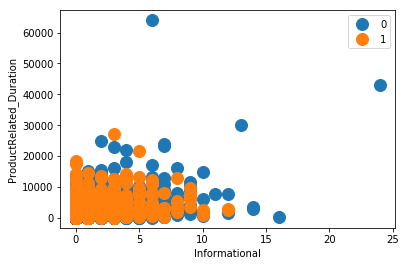

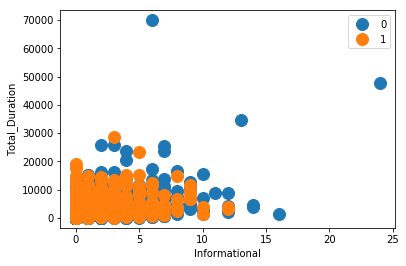

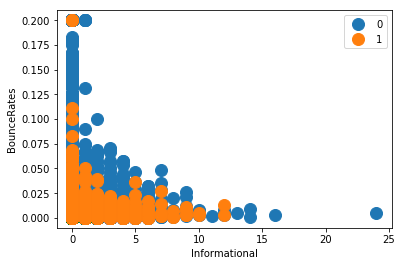

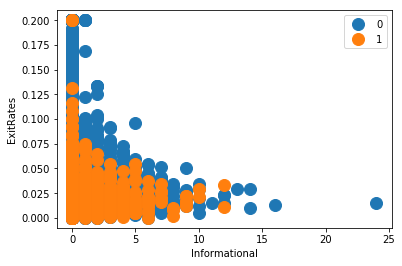

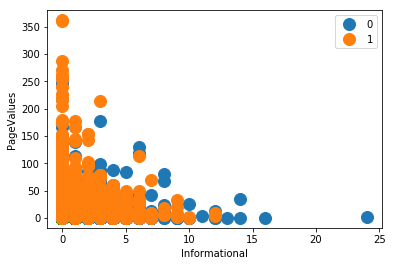

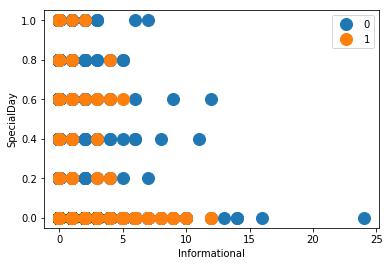

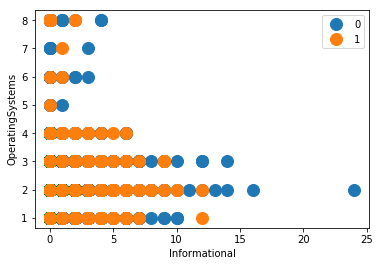

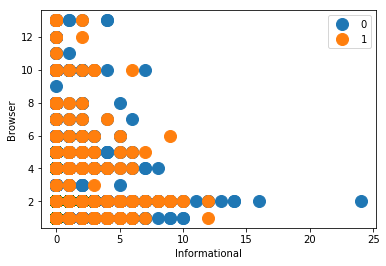

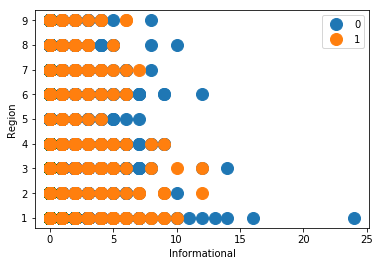

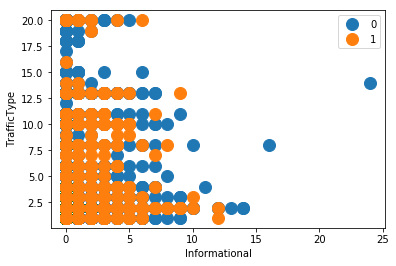

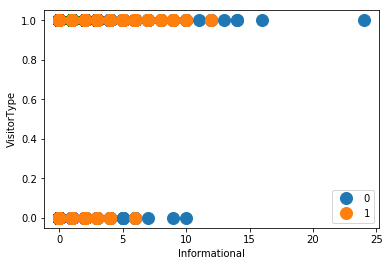

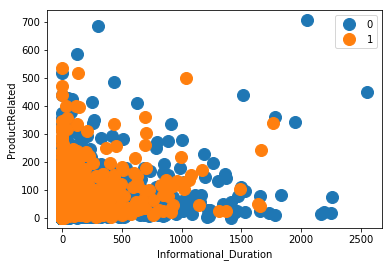

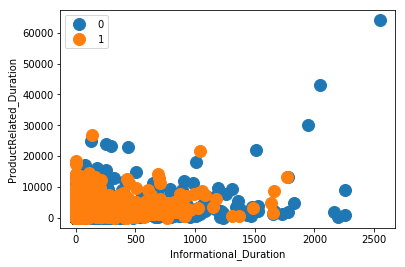

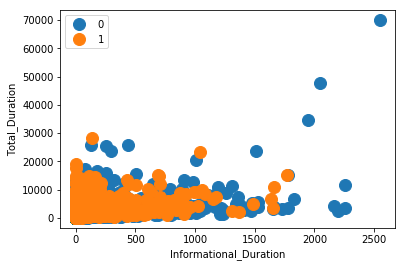

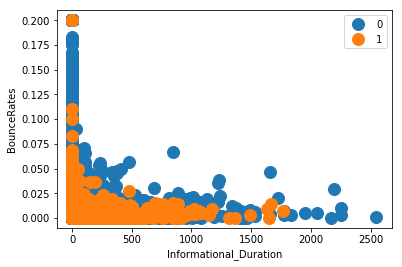

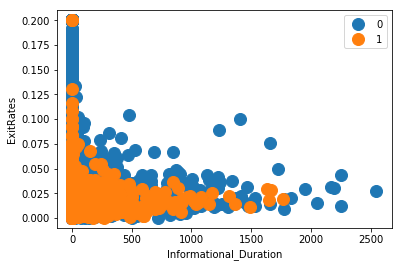

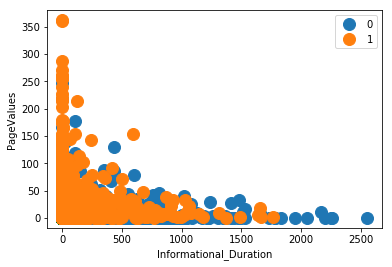

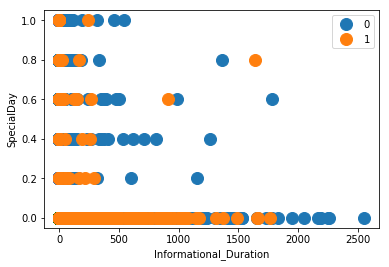

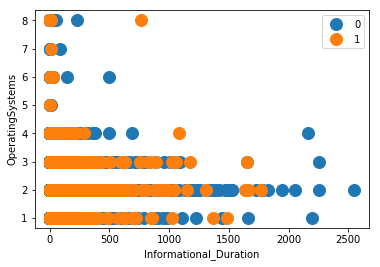

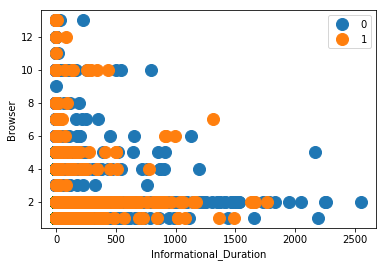

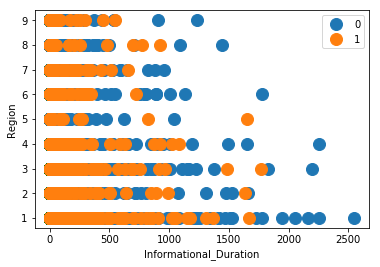

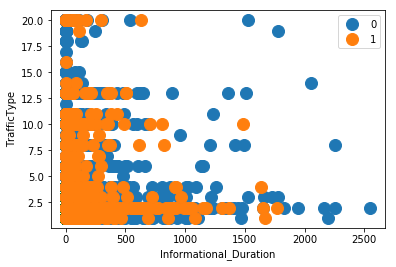

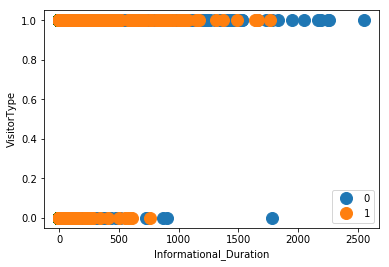

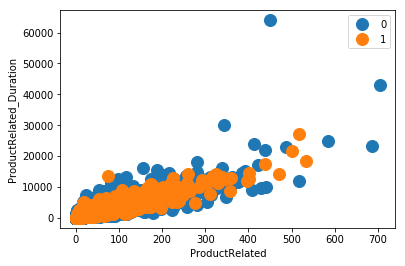

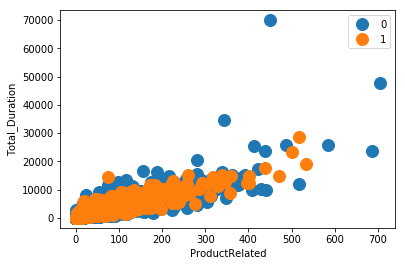

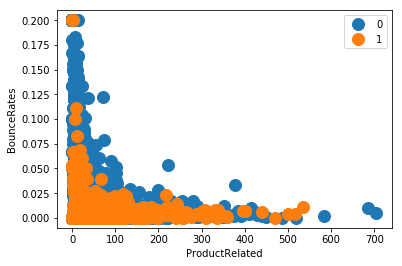

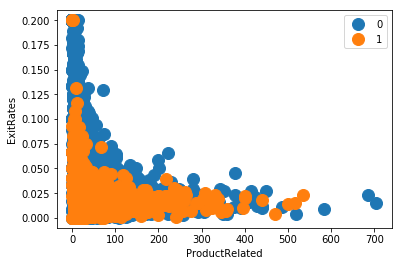

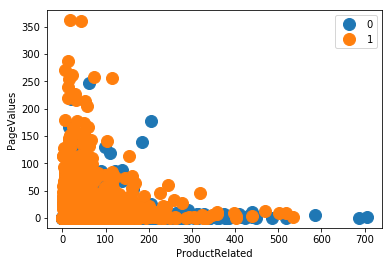

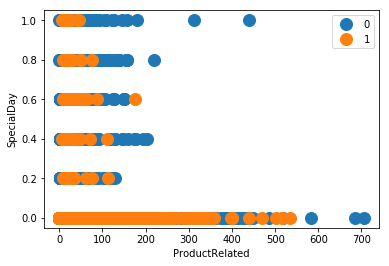

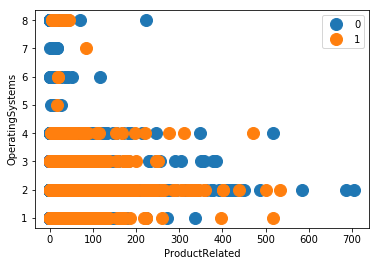

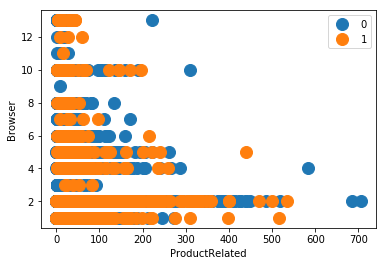

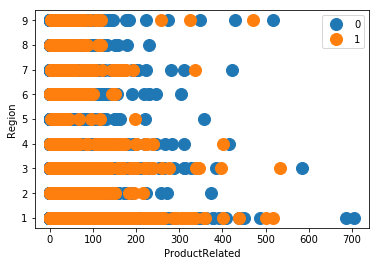

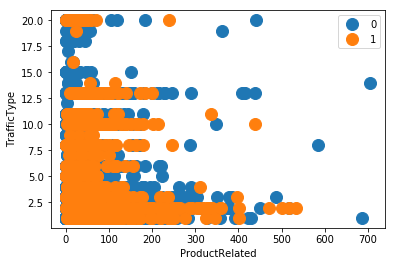

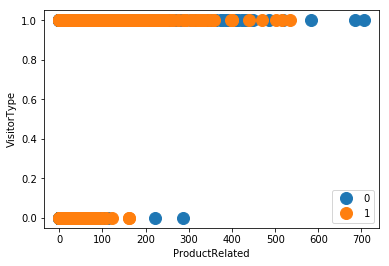

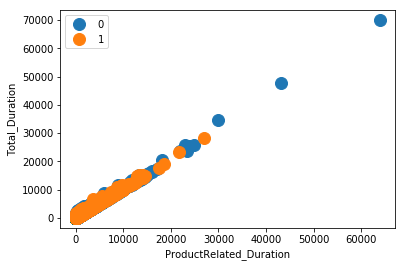

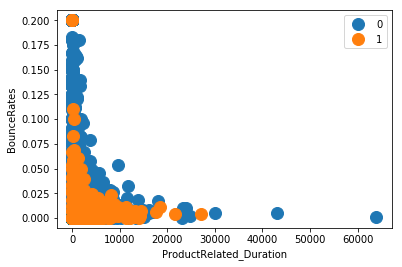

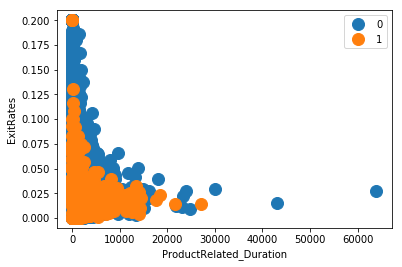

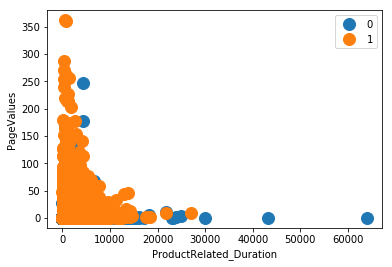

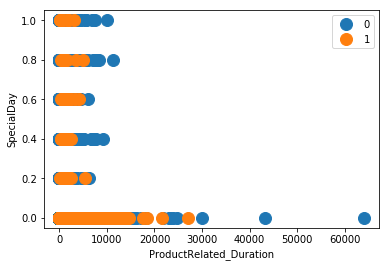

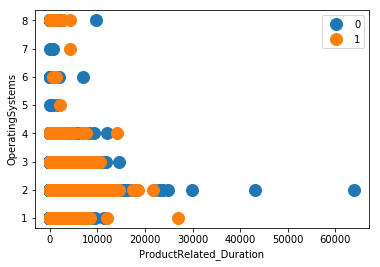

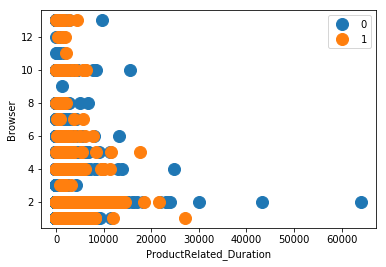

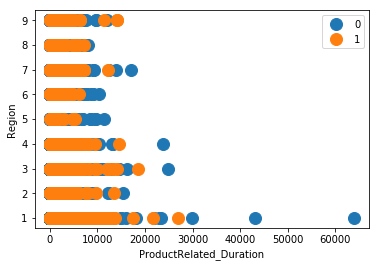

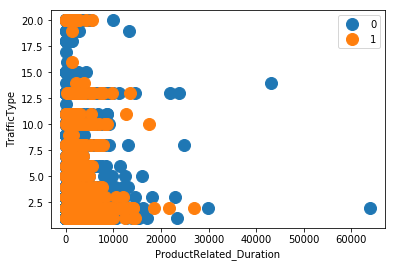

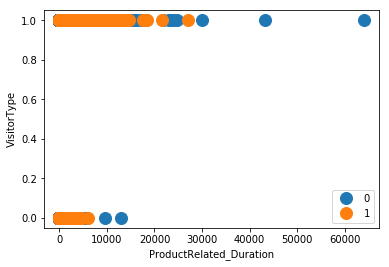

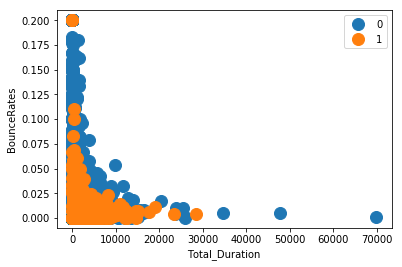

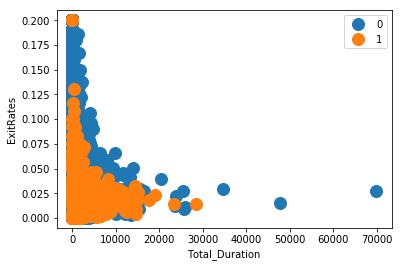

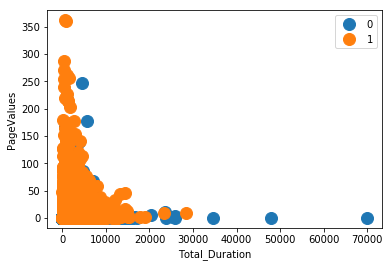

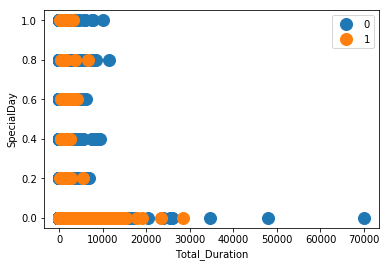

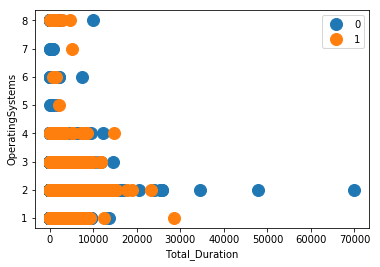

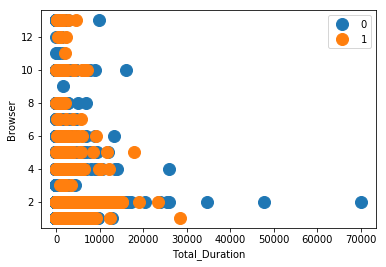

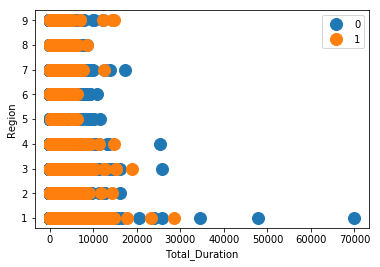

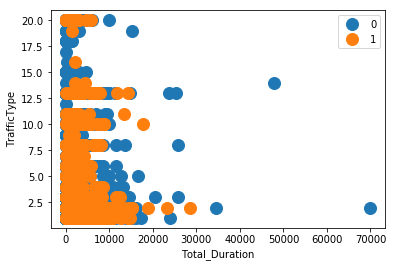

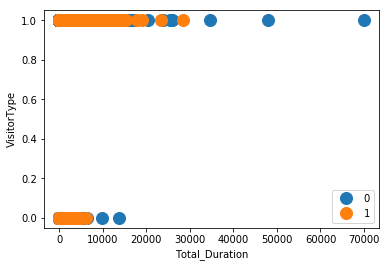

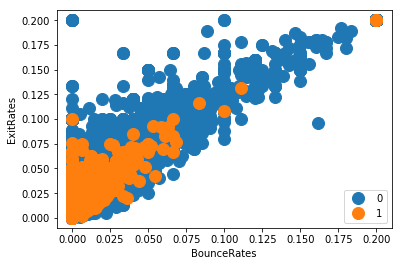

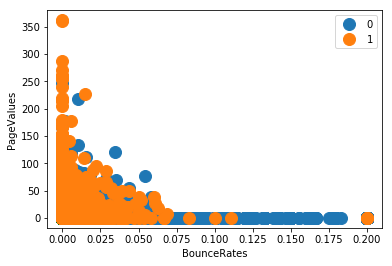

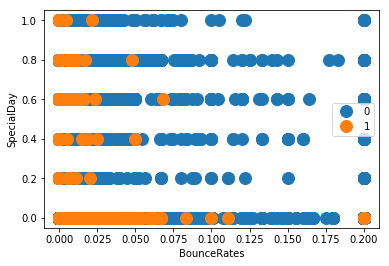

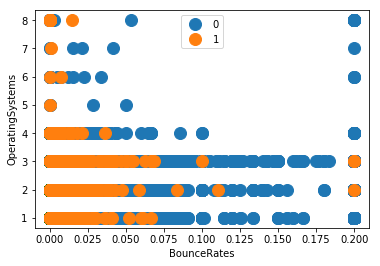

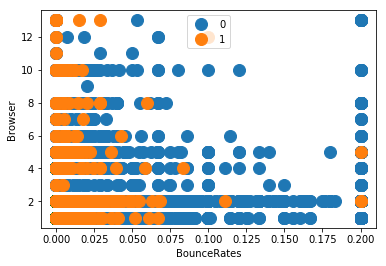

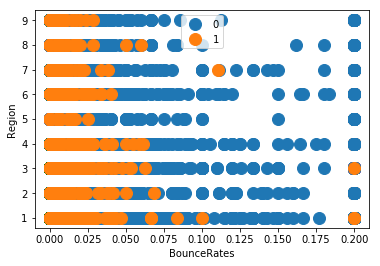

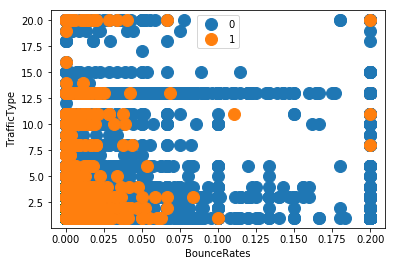

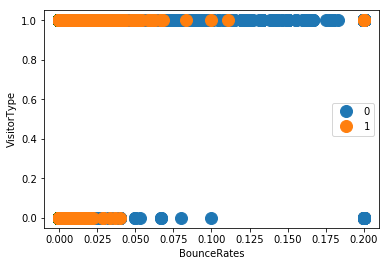

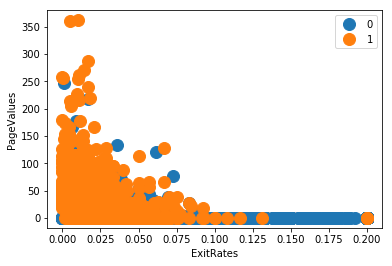

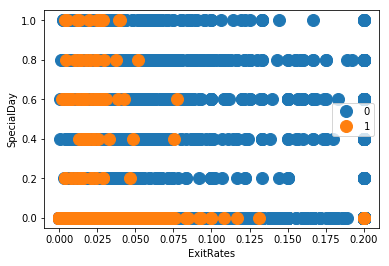

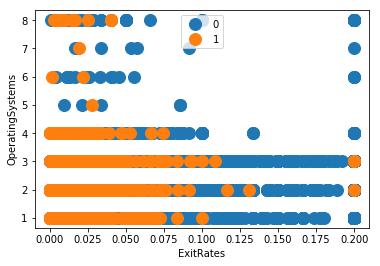

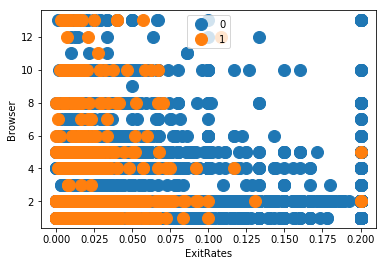

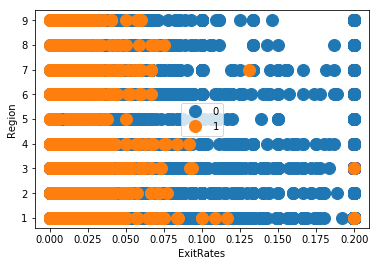

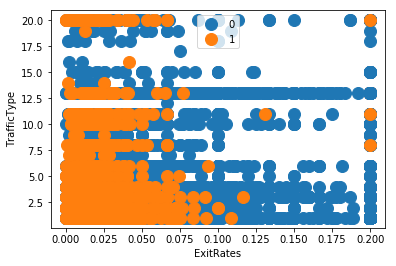

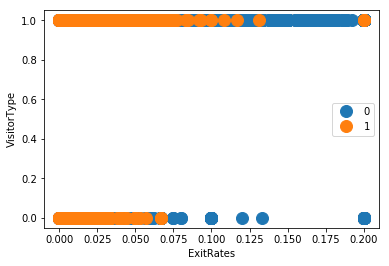

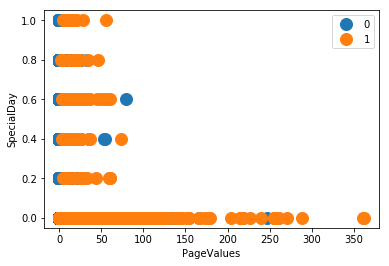

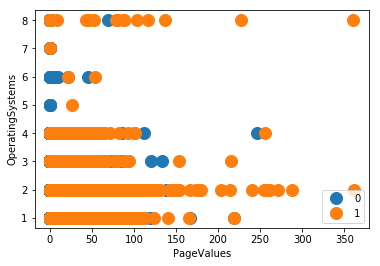

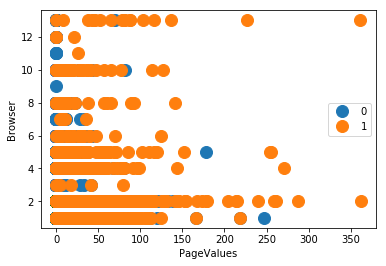

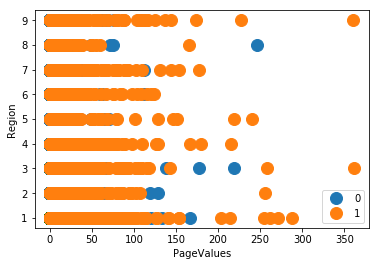

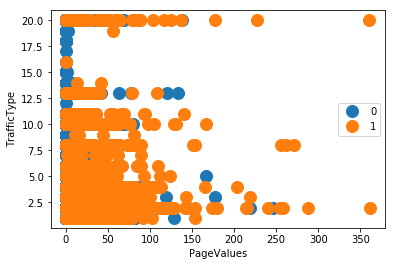

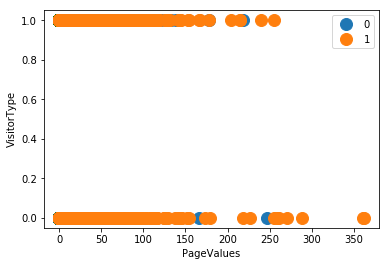

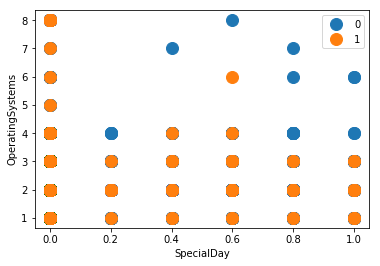

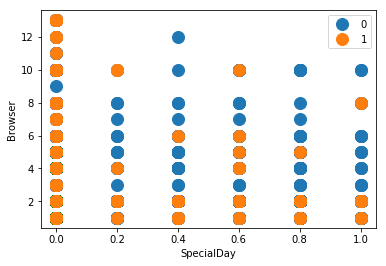

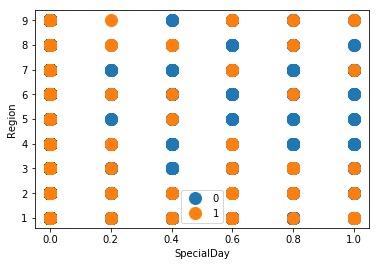

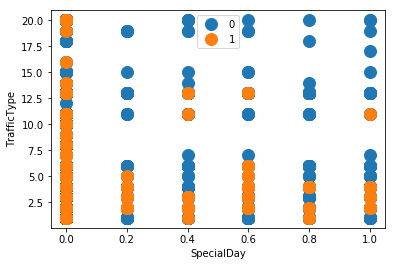

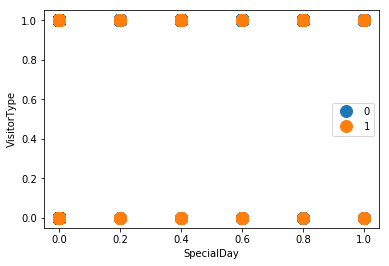

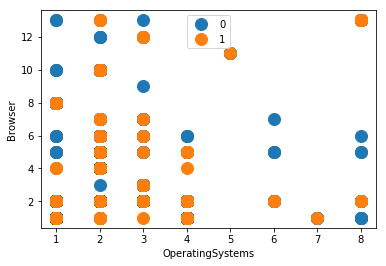

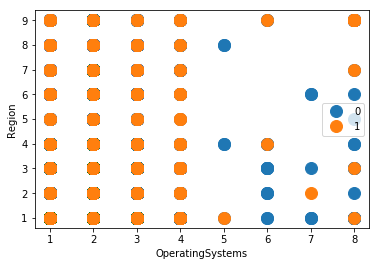

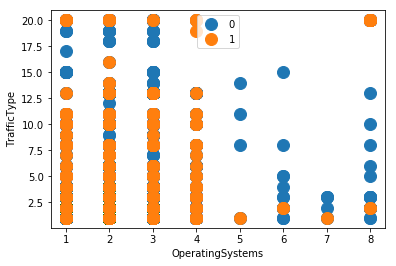

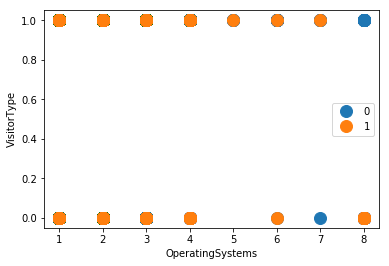

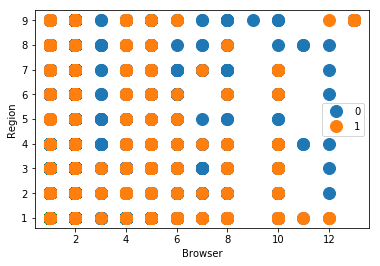

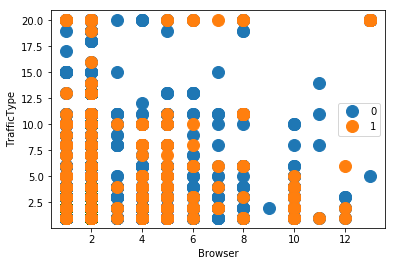

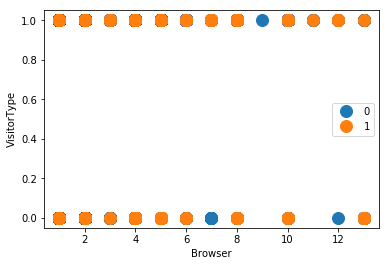

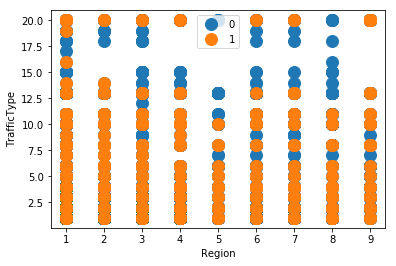

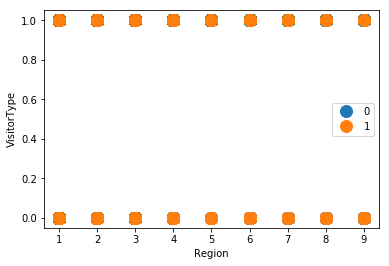

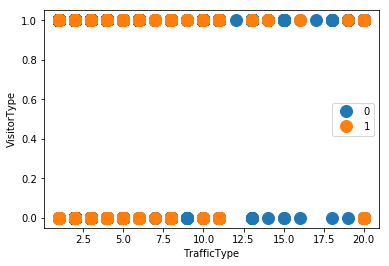

In [45]:
temp = None
feature = np.array(feature)
for x_idx in range(1,feature.shape[1]):
    for y_idx in range(x_idx+1,feature.shape[1]-1):
        final = []
        for row_idx in range(feature.shape[0]):
            final.append([feature[row_idx][x_idx], feature[row_idx][y_idx], feature[row_idx][0]]) 
        final = pd.DataFrame(final)
        final.columns = ['x', 'y', 'result']
        temp = pd.DataFrame(dict(x=final['x'], y=final['y'], label=final['result']))
#     print(x_idx,y_idx)
        corr_draw(temp,x_idx,y_idx)

# Feature Selection


In [66]:
#exhaustive feature selection
feature_names = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Total_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

lr = LogisticRegression()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(lr, 
           min_features=1,
           max_features=3,
           scoring='accuracy',
           print_progress=True,
           cv=10)

efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 833/833

Best accuracy score: 0.88
Best subset (indices): (9, 15, 16)
Best subset (corresponding names): ('PageValues', 'VisitorType', 'Weekend')


In [67]:
result = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
result.sort_values('avg_score', inplace=True, ascending=False)
result.head()

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
797,0.884261,0.0108716,"[0.8978930307941653, 0.9059967585089141, 0.908...","(9, 15, 16)","(PageValues, VisitorType, Weekend)",0.0146376,0.00487921
790,0.88418,0.0109122,"[0.8987034035656402, 0.9051863857374393, 0.907...","(9, 12, 15)","(PageValues, Browser, VisitorType)",0.0146924,0.00489746
754,0.884099,0.0106326,"[0.8962722852512156, 0.9076175040518638, 0.906...","(8, 9, 15)","(ExitRates, PageValues, VisitorType)",0.0143159,0.00477196
130,0.883936,0.0109007,"[0.8978930307941653, 0.9051863857374393, 0.907...","(9, 15)","(PageValues, VisitorType)",0.0146769,0.00489229
795,0.883855,0.0108448,"[0.8970826580226904, 0.9051863857374393, 0.907...","(9, 14, 15)","(PageValues, TrafficType, VisitorType)",0.0146016,0.00486721


In [40]:
X_ = df[['VisitorType', 'PageValues']]
X_ = X_.fillna(0).values

y_ = df['Revenue']

In [41]:
## LR 10-FOLD on two variables
logisticRegr = LogisticRegression()

acc = []

for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    logisticRegr.fit(X_train, y_train)
    pred = logisticRegr.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

print(np.mean(acc))

classifier.append('LogisticRegression')
accuracy.append(np.mean(acc))

0.8844282238442822
